<a href="https://colab.research.google.com/github/elephantcastle/machine-learning-grokking/blob/main/04_Naive_Bayes_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes model
It does what most classification models do, which is predict a label out of a set of features.

**Prior -> Event -> Posterior**: Probability of an event --> new information available --> updated probability of an event. 

For example the probability of being sick 1/10000. A test with accuracy of 99%  for both healthy and sick gives us the matrix below.

If somebody took a test and is positive(sick) then his probability of being sick(new probability) is $\frac{ 99 }{ 9999 + 99 }=0.0098$ or $0.98$%; less that the initial one.

This is because it is more probable to be amongst the ones misdiagnosed than the ones actually being sick.

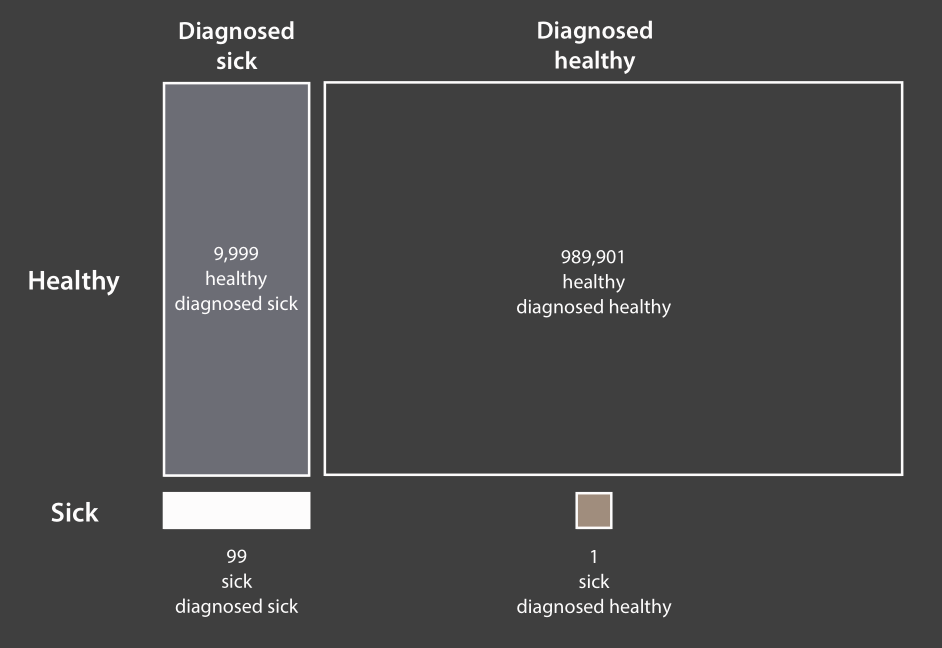

**Bayes theorem:**

For events E and F ($\text{P}(E|F)$ probability of $E$ knowing $F$)

\begin{align} 
  \text{P}(E|F) = \frac{ \text{P}(F|E)*\text{P}(E) }{ \text{P}(F) }
\end{align}

\begin{align} 
  \text{P}(E|F) = \frac{ \text{P}(F|E)*\text{P}(E) }{ \text{P}(F|E)*\text{P}(E) + \text{P}(F|E^C)*\text{P}(E^C) }
\end{align}

To check for multiple events we can use a "naive assumption" in determinate models: the events are completely independent of each other, this lets us use the product of probabilities, a general version of the theorem is below. 
\begin{align} 
  \text{P}(spam|x_1, x_2, ..., x_n) = \frac{ \text{P}(spam|x_1)*\text{P}(spam|x_2)*...\text{P}(spam|x_n)*\text{P}(spam)}{ \text{P}(x_1|spam)*\text{P}(x_2|spam)...\text{P}(x_n|spam)*\text{P}(spam) + \text{P}(x_1|spam^C)*\text{P}(x_2|spam^C)...\text{P}(x_n|spam^C)*\text{P}(spam^C)}
\end{align}





---


### The below example tries to build a Bayesian model to classify emails by their content.

In [ ]:
import numpy as np
import pandas as pd

emails = pd.read_csv('emails.csv')

def process_email(text):
    text = text.lower()
    return list(set(text.split()))

emails['words'] = emails['text'].apply(process_email)
emails[:10]

num_emails = len(emails)
num_spam = sum(emails['spam'])

print("Number of emails:", num_emails)
print("Number of spam emails:", num_spam)
print()

# Calculating the prior probability that an email is spam
print("Probability of spam:", num_spam/num_emails)

Number of emails: 5728
Number of spam emails: 1368

Probability of spam: 0.2388268156424581


In [ ]:
model = {}

# Training process
for index, email in emails.iterrows():
    for word in email['words']:
        if word not in model:
            model[word] = {'spam': 1, 'ham': 1}
        if word in model:
            if email['spam']:
                model[word]['spam'] += 1
            else:
                model[word]['ham'] += 1

In [ ]:
def predict_bayes(word):
    word = word.lower()
    num_spam_with_word = model[word]['spam']
    num_ham_with_word = model[word]['ham']
    return 1.0*num_spam_with_word/(num_spam_with_word + num_ham_with_word)

In [ ]:
def predict_naive_bayes(email):
    total = len(emails)
    num_spam = sum(emails['spam'])
    num_ham = total - num_spam
    email = email.lower()
    words = set(email.split())
    spams = [1.0]
    hams = [1.0]
    for word in words:
        if word in model:
            spams.append(model[word]['spam']/num_spam*total) #  just divide everywhere by total to get the original formula
            hams.append(model[word]['ham']/num_ham*total) # this is done to avoid zero division error
    prod_spams = np.long(np.prod(spams)*num_spam)   
    prod_hams = np.long(np.prod(hams)*num_ham)
    return prod_spams/(prod_spams + prod_hams)

In [ ]:
predict_naive_bayes('buy cheap lottery easy money now')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use

0.999973472265966